In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A
from tifffile import imread
import segmentation_models as sm
from random import randint

Segmentation Models: using `keras` framework.


In [10]:
train_x = imread('./assets/training.tif')
train_y = imread('./assets/training_groundtruth.tif')
test_x = imread('./assets/testing.tif')
text_y = imread('./assets/testing_groundtruth.tif')

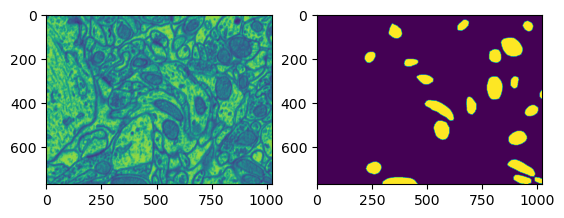

In [35]:
fig, axs = plt.subplots(1, 2)

r = randint(0, train_x.shape[0]-1)
axs[0].imshow(train_x[r])
axs[1].imshow(train_y[r])

In [6]:
tmp = np.array([5, 2, 9, 10])

np.argmax(tmp)

3

In [8]:
OPENSLIDE_PATH = "D:/NSC2024_dataset/openslide-bin-4.0.0.2-windows-x64/bin"

import os

# Windows 
with os.add_dll_directory(OPENSLIDE_PATH):
    import openslide

from SlideRunner.dataAccess.database import Database


In [41]:
DB = Database().open('./testdb.sqlite')

In [44]:
slideid = DB.findSlideWithFilename('S56-01604_phD_B.svs','')
DB.loadIntoMemory(slideid)

In [45]:
for anno in DB.annotations.keys():
    print(anno,':',DB.annotations[anno])

1 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012AAF0>
2 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029899FF40>
3 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029875B0A0>
4 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012AB20>
5 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012A730>
6 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012A7C0>
7 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012A1C0>
8 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012A370>
9 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x000002029012A670>
10 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x000002029012ABE0>
11 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x000002029012AE20>
12 : <SlideRunner.dataAccess.annotat

In [47]:
tmp = np.array(DB.annotations[1].coordinates)
print(tmp)

[[61595 42984]
 [61580 43043]
 [61567 43114]
 [61567 43116]
 [61568 43118]
 [61594 43212]
 [61594 43214]
 [61595 43217]
 [61624 43287]
 [61667 43312]
 [61757 43306]
 [61830 43288]
 [61832 43287]
 [61892 43251]
 [61894 43251]
 [61930 43225]
 [61932 43224]
 [61947 43182]
 [61899 43116]
 [61896 43111]
 [61892 43107]
 [61850 43045]
 [61846 43040]
 [61844 43036]
 [61819 42992]
 [61721 42942]
 [61717 42941]
 [61610 42958]
 [61607 42960]
 [61598 42984]
 [61595 42984]]


In [ ]:
print(tmp)


mn = tmp.min(axis=0)
mx = tmp.max(axis=0)

mn_x, mn_y = mn
overlap = 25
tl_x = mn_x - (mn_x%256) 
tl_y = mn_y - (mn_y%256)

tl_x -= overlap*(tl_x>0)
tl_y -= overlap*(tl_y>0)

# print(mn, mx)

sz = (306, 306)

In [52]:
slide = openslide.open_slide('D:/NSC2024_dataset/svs/S56-01604_phD_B.svs')

In [53]:
reg = slide.read_region(location=(tl_x, tl_y), level=0, size=sz)

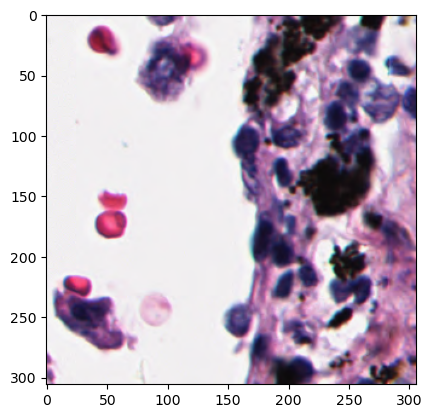

In [54]:
plt.imshow(reg)

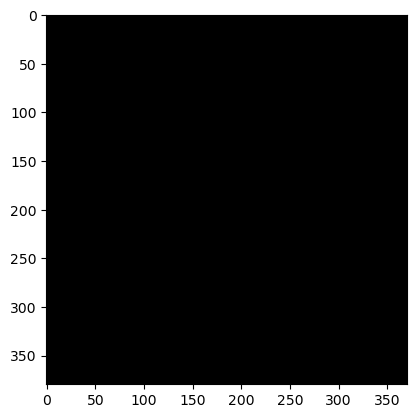

In [38]:
black = np.full(tuple(sz), 0)
plt.imshow(black, cmap='grey')